In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

In [6]:
df = pd.read_csv("../data/company_financials.csv")

In [7]:
print("Basic info:")
df.info()

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         144 non-null    object 
 1   Department    144 non-null    object 
 2   Expenses      144 non-null    float64
 3   Revenue       144 non-null    float64
 4   Profit        144 non-null    float64
 5   ProfitMargin  144 non-null    float64
dtypes: float64(4), object(2)
memory usage: 6.9+ KB


In [8]:
print("Summary statistics:")
df.describe()

Summary statistics:


,Expenses,Revenue,Profit,ProfitMargin
count,144.000000,144.000000,144.000000,144.000000
mean,47428.739722,74654.870625,27226.130903,0.352972
std,23074.318359,37563.453542,17095.075059,0.092833
min,17707.760000,25640.260000,5265.930000,0.169500
25%,30299.370000,43495.130000,14397.015000,0.280650
50%,37951.610000,64750.005000,24172.080000,0.370300
75%,72210.037500,105001.935000,33809.300000,0.430550
max,100639.090000,165281.030000,81790.910000,0.496700


In [9]:
print("Departments present:")
print(df['Department'].unique())

Departments present:
['Sales' 'Marketing' 'Operations' 'IT' 'HR' 'Finance']


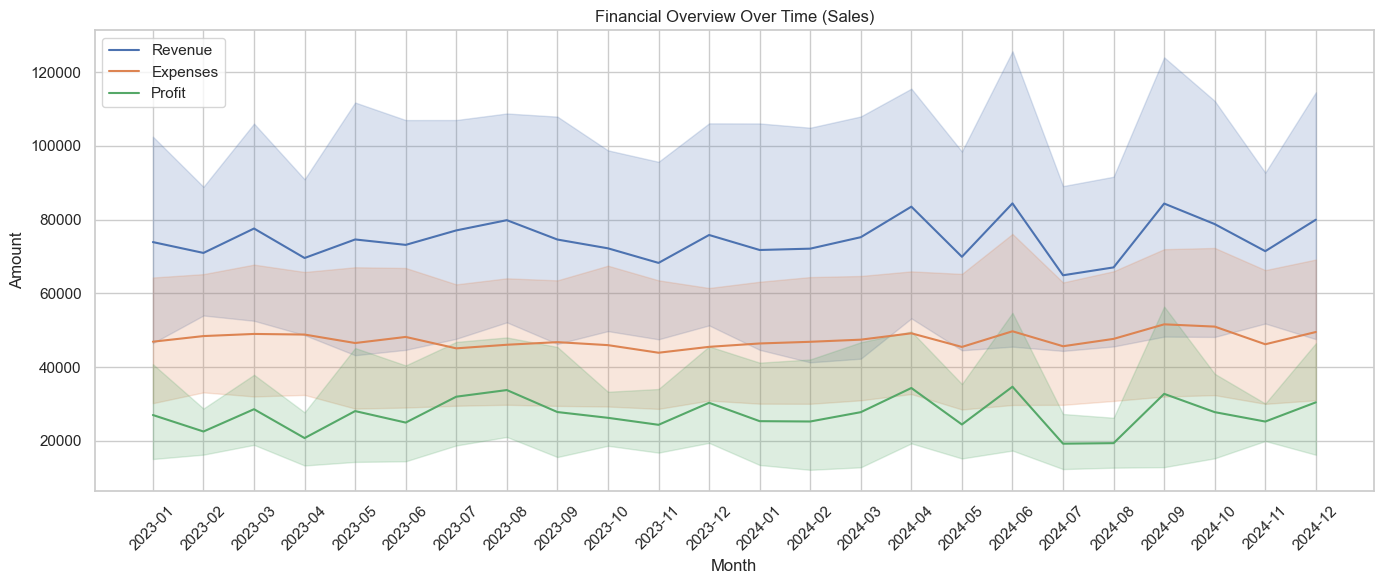

In [10]:
# Visualize Revenue, Expenses, and Profit over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Month', y='Revenue', label='Revenue')
sns.lineplot(data=df, x='Month', y='Expenses', label='Expenses')
sns.lineplot(data=df, x='Month', y='Profit', label='Profit')
plt.title('Financial Overview Over Time (Sales)')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

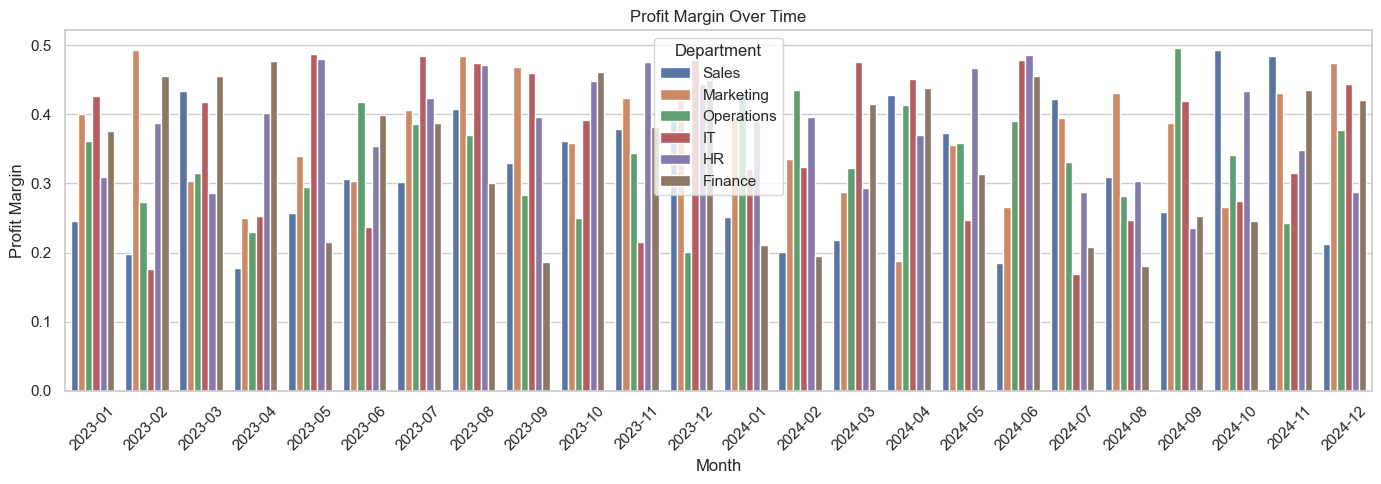

In [11]:
# Visualize Profit Margin
plt.figure(figsize=(14, 5))
sns.barplot(data=df, x='Month', y='ProfitMargin', hue='Department')
plt.title('Profit Margin Over Time')
plt.xlabel('Month')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Average financials per department:
                  Revenue      Expenses        Profit  ProfitMargin
Department                                                         
Operations  128457.432500  83842.080000  44615.352500      0.339562
IT          114967.116667  71347.284167  43619.832500      0.361254
HR           68015.587083  41700.920833  26314.666250      0.382558
Sales        53861.697083  35873.905833  17987.791250      0.318371
Finance      48392.379167  30631.010417  17761.368750      0.346658
Marketing    34235.011250  21177.237083  13057.774167      0.369425


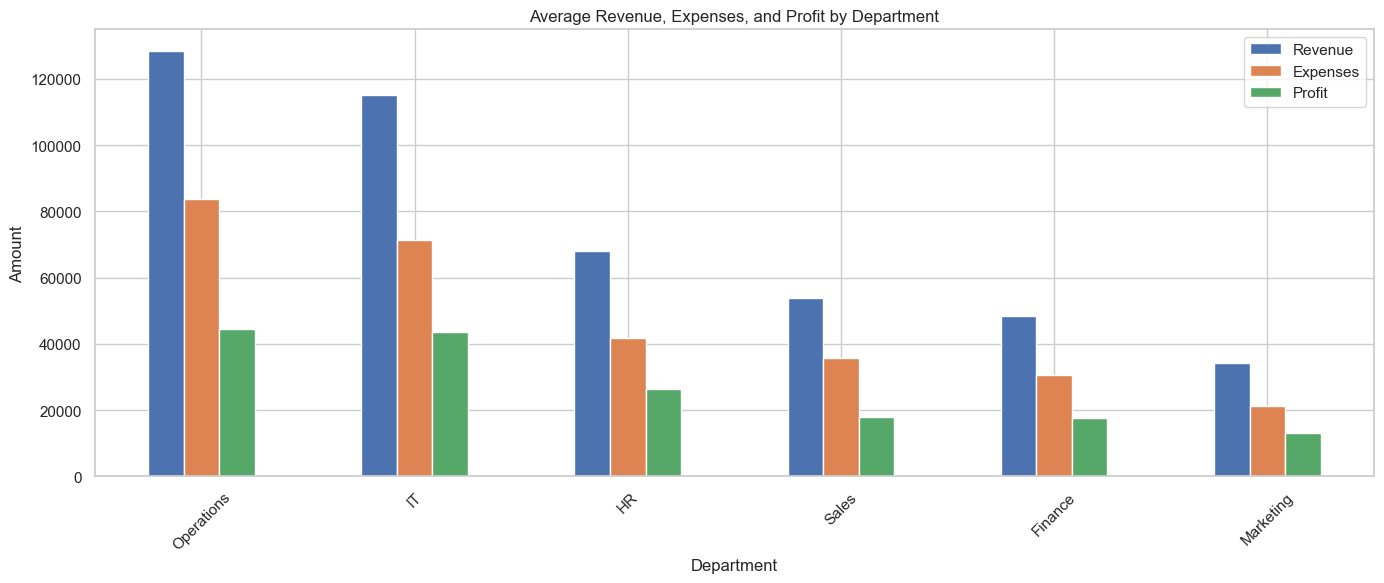

In [12]:
# Aggregate analysis per department (if multiple departments loaded)
if df['Department'].nunique() > 1:
    dept_summary = df.groupby('Department')[['Revenue', 'Expenses', 'Profit', 'ProfitMargin']].mean().sort_values(by='Profit', ascending=False)
    print("\nAverage financials per department:")
    print(dept_summary)

    dept_summary[['Revenue', 'Expenses', 'Profit']].plot(kind='bar')
    plt.title('Average Revenue, Expenses, and Profit by Department')
    plt.ylabel('Amount')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()